<a href="https://colab.research.google.com/github/farhanarrafi/empirical-analysis-cardiovascular-data/blob/main/Emperical_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Data Analysis using Statistical Methods

## Feature Description

* age_years: Age of the patient in years
* height: Height of the patient in centimeters.
* weight: Weight of the patient in kilograms.
* ap_hi: Systolic blood pressure.
* ap_lo: Diastolic blood pressure.Calculated as *BMI = weight / height^2*
* bp_category: Blood pressure category. Categories - Hypertension Stage 1, Hypertension Stage 2

## GitHub Link
[Empirical Analysis of Cardiovascular Data](https://github.com/farhanarrafi/empirical-analysis-cardiovascular-data)


## Data Import

This dataset consolidates information from two primary sources:

* UCI Machine Learning Repository - Heart Disease Dataset
* Kaggle - Heart Disease Dataset by YasserH

[Kaggle Dataset Link](https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease)


In [1]:
import os.path
import json


api_token = {"username":"farhanarrafi","key":"074ead27713d782ad86b0e445765e799"}

# https://stackoverflow.com/a/57401752/3148856
if not os.path.isdir('/root/.kaggle'):
  ! mkdir ~/.kaggle
  ! touch ~/.kaggle/kaggle.json
  with open('/root/.kaggle/kaggle.json', 'w') as file:
      json.dump(api_token, file)
  !chmod 600 ~/.kaggle/kaggle.json

#! kaggle datasets list

In [2]:
if not os.path.isfile('cardio_data_processed.csv'):
  ! kaggle datasets download -d colewelkins/cardiovascular-disease
  ! unzip cardiovascular-disease.zip
  ! rm -rf cardiovascular-disease.zip

  0% 0.00/1.43M [00:00<?, ?B/s]
100% 1.43M/1.43M [00:00<00:00, 166MB/s]
Archive:  cardiovascular-disease.zip
  inflating: cardio_data_processed.csv  


## Data Pre-processing

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

cardioVascular_dataset = pd.read_csv('cardio_data_processed.csv')

# Remove columns
cardioVascular_dataset = cardioVascular_dataset.drop(axis='columns', columns=['age','gender', 'cholesterol','gluc','smoke','alco', 'active','cardio', 'bp_category_encoded'])
# Setting index
cardioVascular_dataset = cardioVascular_dataset.set_index('id')
# Remove bp categories other than Hypertension Stage 1 and 2
cardioVascular_dataset_filtered = cardioVascular_dataset.loc[(cardioVascular_dataset['bp_category'] == 'Hypertension Stage 1') |  (cardioVascular_dataset['bp_category'] == 'Hypertension Stage 2')]


In [4]:
# Select first 2000
cardioVascular_dataset_filtered = cardioVascular_dataset_filtered.sample(5000, random_state=111)
# Check for null values
cardioVascular_dataset_filtered.isna().sum().sum()

0

## Exploratory Data Analysis

<Axes: ylabel='Density'>

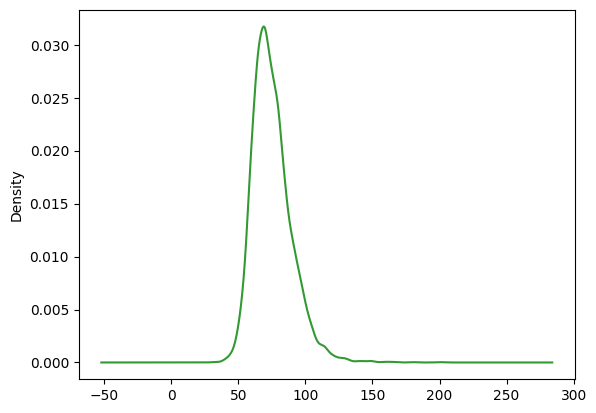

In [53]:
cardioVascular_dataset_filtered['weight'].plot.density(color='green', alpha=0.8)

In [6]:
samples = cardioVascular_dataset_filtered.sample(100, random_state=1199)
# Check for null values https://stackoverflow.com/a/69622929/3148856
samples.isna().sum().sum()

0

In [7]:
samples.describe()

,height,weight,ap_hi,ap_lo,age_years,bmi
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,163.890000,76.79000,130.100000,84.870000,53.520000,28.611298
std,8.247307,13.58497,14.615959,7.950167,6.802376,4.642349
min,148.000000,50.00000,100.000000,70.000000,39.000000,16.514731
25%,158.000000,67.75000,120.000000,80.000000,49.000000,25.154073
50%,164.000000,75.00000,125.000000,80.000000,55.000000,28.037327
75%,168.000000,85.00000,140.000000,90.000000,59.000000,32.013299
max,189.000000,129.00000,180.000000,120.000000,64.000000,41.007403


<Axes: ylabel='Density'>

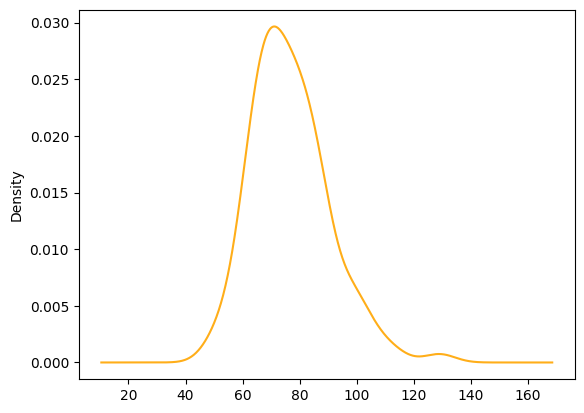

In [52]:
samples['weight'].plot.density(color='orange', alpha=0.9)

<Axes: >

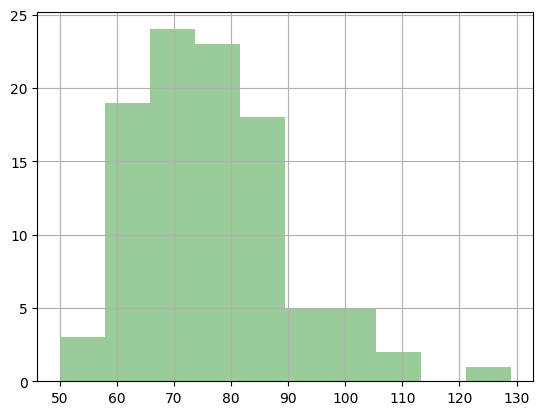

In [51]:
samples['weight'].hist(color='green', alpha=0.4)

### T-Test for one variable

In [10]:
from scipy.stats.mstats import ttest_1samp
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
from statsmodels.stats.weightstats import ttest_ind

test_statistic = ttest_1samp(samples['weight'], popmean= 60, alternative='greater')

print(test_statistic)

Ttest_1sampResult(statistic=12.359246878796654, pvalue=4.401633132970351e-22)


### Z Test for Proportion

In [11]:
from statsmodels.stats.proportion import proportions_ztest

zstat, pval = proportions_ztest(63, 100, value=0.5, prop_var=False, alternative='larger')

print('zstat: ',zstat)
print('pval: ',pval)

zstat:  2.6926023193385333
pval:  0.003544838884025079


### Confidence interval for a binomial proportion

In [12]:
from statsmodels.stats.proportion import proportion_confint

result = proportion_confint(63, 100, alpha=0.05, method='beta')
print(result)

(0.527648359448317, 0.7244334203854486)


In [13]:
#ap_lo_samples = cardioVascular_dataset_filtered['ap_lo'].sample(100, random_state=1199)
# Check for null values https://stackoverflow.com/a/69622929/3148856
#ap_lo_samples.isna().sum().sum()

In [14]:
weight_ap_hi_difference = samples['weight'] - samples['ap_hi']
weight_ap_hi_difference.describe()

count    100.000000
mean     -53.310000
std       18.849588
min     -101.000000
25%      -62.000000
50%      -52.500000
75%      -40.750000
max       -7.000000
dtype: float64

In [15]:
weight_ap_lo_difference = samples['weight'] - samples['ap_lo']
weight_ap_lo_difference.describe()

count    100.000000
mean      -8.080000
std       14.315831
min      -35.000000
25%      -17.000000
50%      -10.000000
75%        0.000000
max       39.000000
dtype: float64

<Axes: >

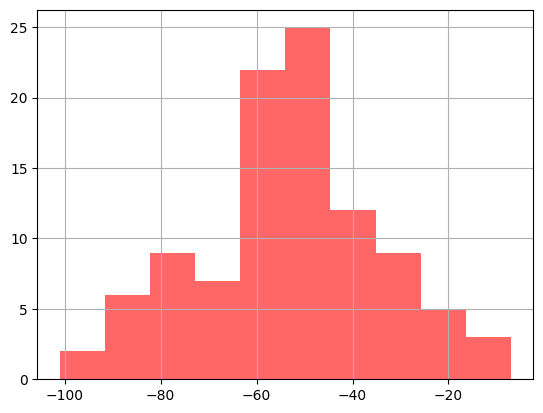

In [50]:
weight_ap_hi_difference.hist(color='red', alpha=0.6)


<Axes: >

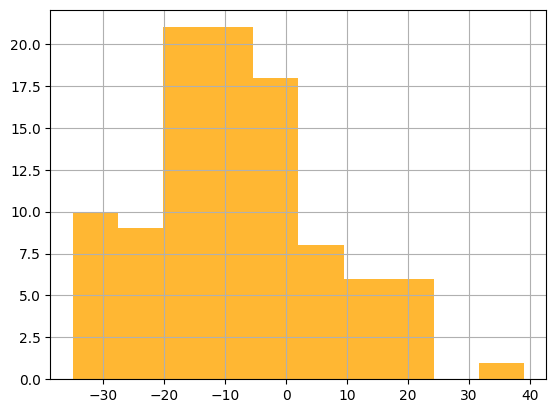

In [49]:
weight_ap_lo_difference.hist(color='orange', alpha=0.8)

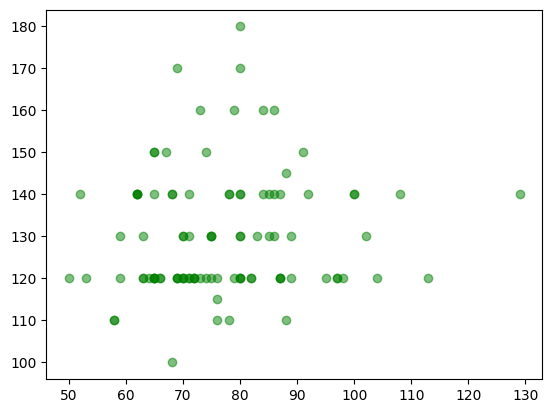

In [18]:
import matplotlib.pyplot as plt

x = samples['weight']
y = samples['ap_hi']

plt.scatter(x, y , color='green', alpha=0.5)
plt.show()

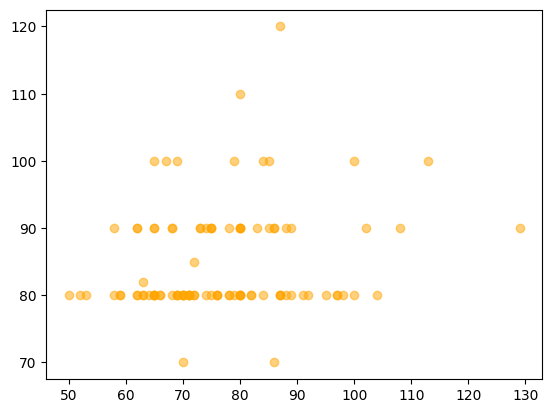

In [19]:
x = samples['weight']
y = samples['ap_lo']

plt.scatter(x, y , color='orange', alpha=0.5)
plt.show()

### Correlation calculation for Weight and Systolic Blood Pressure

In [20]:
x = samples['weight']
y = samples['ap_hi']

Zx = (x - x.mean()) / x.std()
Zy = (y - y.mean()) / y.std()
correlationR = np.multiply(Zx,Zy).sum() / (len(x)- 1)
print('weight and Systolic Blood Pressure correlation: ',correlationR)

weight and Systolic Blood Pressure correlation:  0.10795546708354092


### Correlation calculation for Weight and Diastolic Blood Pressure

In [21]:
x = samples['weight']
y = samples['ap_lo']

Zx = (x - x.mean()) / x.std()
Zy = (y - y.mean()) / y.std()
correlationR = np.multiply(Zx,Zy).sum() / (len(x)- 1)
print('weight and Diastolic Blood Pressure correlation: ',correlationR)

weight and Diastolic Blood Pressure correlation:  0.19820571321253885


### Correlation Confidence Calculation

Correlation confidence: https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/

In [22]:
from scipy import stats

x = samples['weight']
y1 = samples['ap_hi']
y2 = samples['ap_lo']

pearsonR1 = stats.pearsonr(x,y1)
pearsonR2 = stats.pearsonr(x,y2)
print('weight and ap_hi correlation: ', pearsonR1.correlation)
print('weight and ap_lo correlation: ', pearsonR2.correlation)

weight and ap_hi correlation:  0.10795546708354091
weight and ap_lo correlation:  0.1982057132125388


In [23]:
pearsonR1_CI = pearsonR1.confidence_interval(confidence_level=0.95)
pearsonR2_CI = pearsonR2.confidence_interval(confidence_level=0.95)

print('weight and ap_hi correlation CI: ', pearsonR1_CI)
print('weight and ap_lo correlation CI: ', pearsonR2_CI)

weight and ap_hi correlation CI:  ConfidenceInterval(low=-0.09037908575559124, high=0.29805353550469366)
weight and ap_lo correlation CI:  ConfidenceInterval(low=0.001860007855474083, high=0.379836348657462)


### Analysis with Dummy Variables

https://stackoverflow.com/a/53756024/3148856

In [24]:
from scipy import stats

#bp_category_types = list(set(samples['bp_category']))

Y = pd.get_dummies(data = samples['bp_category'], drop_first=True)
#print(Y)

X = samples['weight']

samples.groupby("bp_category")["weight"].mean()

#res = stats.linregress(X, Y)


bp_category
Hypertension Stage 1    75.591549
Hypertension Stage 2    79.724138
Name: weight, dtype: float64

In [25]:
X = X.to_frame()

## Model Building and Testing

## Creating X_test and Y_test

In [26]:
test_samples = cardioVascular_dataset_filtered.sample(100, random_state=19)
# Check for null values https://stackoverflow.com/a/69622929/3148856
X_test = test_samples['weight'].to_frame()
Y_test = pd.get_dummies(data = test_samples['bp_category'], drop_first=True)

## Creating Evaluator - Adjusted R2

In [27]:
# https://stackoverflow.com/a/73012709/3148856
from sklearn.metrics import r2_score

def r2(y_test: np.ndarray, y_predicted: np.ndarray):
    """ R2 Score """
    return r2_score(y_test, y_predicted)

def adjr2(y_test: np.ndarray, y_predicted: np.ndarray, no_of_sample: np.int, no_of_variable: np.int):
    """ R2 Score """
    return 1-(1-r2(y_test,y_predicted))*(no_of_sample-1)/(no_of_sample-no_of_variable)

<ipython-input-27-9d386a914fbf>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def adjr2(y_test: np.ndarray, y_predicted: np.ndarray, no_of_sample: np.int, no_of_variable: np.int):


## Regression

In [28]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(X, Y)

Y_predictions = reg.predict(X_test)

In [29]:
reg.score(X,Y)

0.019246338896240167

In [30]:
# slope
reg.coef_

array([[0.00465721]])

In [31]:
# intercept
reg.intercept_

array([-0.06762726])

### Regression Plotting

In [32]:
#Y_test = -0.06762726 + 0.00465721 * X_test['weight']

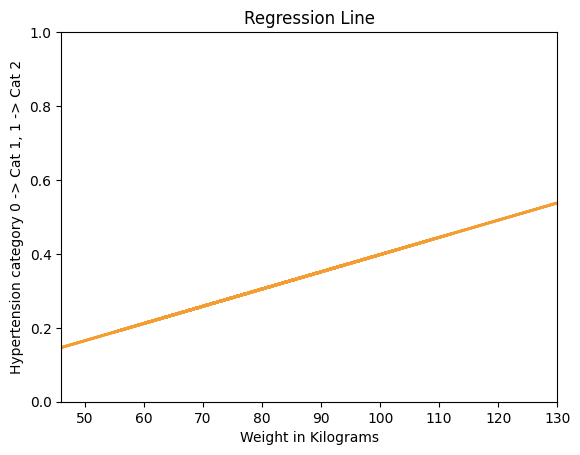

In [33]:

#plt.scatter(X_test, Y_test, color="black")
plt.title('Regression Line')
plt.xlabel('Weight in Kilograms')
plt.ylabel('Hypertension category 0 -> Cat 1, 1 -> Cat 2')
plt.xlim([X_test['weight'].min(), X_test['weight'].max()])
plt.ylim([0, 1])
#plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_predictions, color="#F28500", alpha=0.8, linewidth=2)

### Residual Plotting

In [34]:
# residual = observed y - predicted y
residual = Y_test - Y_predictions

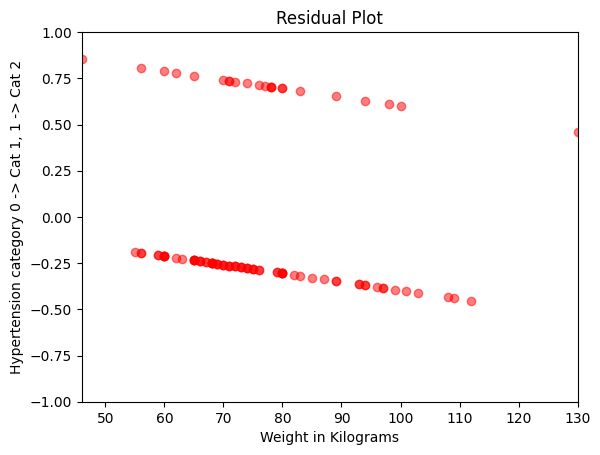

In [35]:
plt.title('Residual Plot')
plt.xlabel('Weight in Kilograms')
plt.ylabel('Hypertension category 0 -> Cat 1, 1 -> Cat 2')
plt.xlim([X_test['weight'].min(), X_test['weight'].max()])
plt.ylim([-1, 1])
plt.scatter(X_test, residual, color="red", alpha=0.5)
#plt.plot(X_test, Y_predictions, color="blue", linewidth=3)

## Multi Regression

In [36]:
samples.head()

,height,weight,ap_hi,ap_lo,age_years,bmi,bp_category
id,,,,,,,
48366,150,65.0,150,100,59,28.888889,Hypertension Stage 2
40774,153,78.0,140,90,49,33.320518,Hypertension Stage 2
41092,159,75.0,120,80,62,29.666548,Hypertension Stage 1
7611,164,72.0,120,80,52,26.769780,Hypertension Stage 1
47616,158,85.0,130,90,52,34.049031,Hypertension Stage 1


In [37]:
from sklearn.linear_model import LinearRegression

Y_multi = pd.get_dummies(data = samples['bp_category'], drop_first=True)
#print(Y)

X_multi = samples.drop(axis='columns', columns=['height', 'age_years', 'bmi', 'bp_category'], index=None)

X_multi.head()

,weight,ap_hi,ap_lo
id,,,
48366,65.0,150,100
40774,78.0,140,90
41092,75.0,120,80
7611,72.0,120,80
47616,85.0,130,90


In [38]:
X_test_multi = test_samples.drop(axis='columns', columns=['height', 'age_years', 'bmi', 'bp_category'], index=None)

In [39]:
X_test_multi.head()

,weight,ap_hi,ap_lo
id,,,
97739,93.0,130,80
41567,65.0,120,80
70826,72.0,120,80
7693,76.0,170,90
13593,96.0,120,80


In [40]:
multiReg = LinearRegression().fit(X_multi, Y_multi)

Y_predictions_multi_reg = multiReg.predict(X_test_multi)

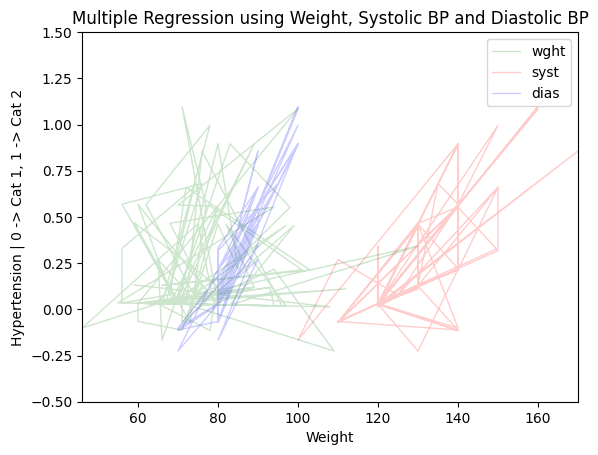

In [41]:
plt.title('Multiple Regression using Weight, Systolic BP and Diastolic BP')
plt.ylabel('Hypertension | 0 -> Cat 1, 1 -> Cat 2')
plt.xlabel('Weight')
plt.xlim([X_test_multi.min().min(), X_test_multi.max().max()])
plt.ylim([-.5, 1.5])
#plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test_multi['weight'], Y_predictions_multi_reg, label='wght', color="green", alpha=0.2, linewidth=1)
plt.plot(X_test_multi['ap_hi'], Y_predictions_multi_reg, label='syst', color="red", alpha=0.2, linewidth=1)
plt.plot(X_test_multi['ap_lo'], Y_predictions_multi_reg, label='dias', color="blue", alpha=0.2, linewidth=1)
plt.legend()
plt.show()

In [42]:
# slope
multiReg.coef_

array([[-0.00040092,  0.00985488,  0.03373901]])

In [43]:
# intercept
multiReg.intercept_

array([-3.82476257])

In [44]:
print(r2(Y_test, Y_predictions))

print(adjr2(Y_test, Y_predictions, len(samples), 1))

print(r2(Y_test, Y_predictions_multi_reg))

print(adjr2(Y_test, Y_predictions_multi_reg, len(samples), 3))


-0.0212550496016517
-0.0212550496016517
0.47015134027537364
0.4592266256418762


## Advanced Multi Regression

In [45]:
from sklearn.linear_model import LinearRegression

Y_multi = pd.get_dummies(data = samples['bp_category'], drop_first=True)

X_multi_w_drop = samples.drop(axis='columns', columns=['weight','height', 'age_years', 'bmi', 'bp_category'], index=None)

X_test_multi_w_drop  = test_samples.drop(axis='columns', columns=['weight','height', 'age_years', 'bmi', 'bp_category'], index=None)

# X_multi_w_drop.head()

multiReg_w_drop = LinearRegression().fit(X_multi_w_drop, Y_multi)

Y_predictions_multi_reg_w_drop = multiReg_w_drop.predict(X_test_multi_w_drop)

print(r2(Y_test, Y_predictions_multi_reg_w_drop))

print(adjr2(Y_test, Y_predictions_multi_reg_w_drop, len(samples), 2))

0.46878169465555275
0.4633610997030584


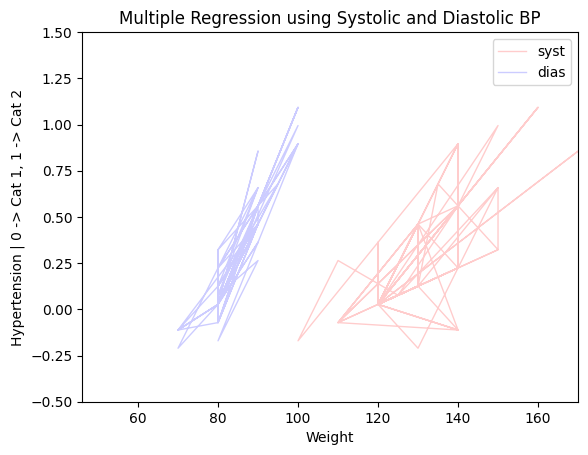

In [46]:
plt.title('Multiple Regression using Systolic and Diastolic BP')
plt.ylabel('Hypertension | 0 -> Cat 1, 1 -> Cat 2')
plt.xlabel('Weight')
plt.xlim([X_test_multi.min().min(), X_test_multi.max().max()])
plt.ylim([-.5, 1.5])
plt.plot(X_test_multi['ap_hi'], Y_predictions_multi_reg_w_drop, label='syst', color="red", alpha=0.2, linewidth=1)
plt.plot(X_test_multi['ap_lo'], Y_predictions_multi_reg_w_drop, label='dias', color="blue", alpha=0.2, linewidth=1)
plt.legend()
plt.show()

## Conclusion


As per our analysis it seems that using two variables - Systolic and Diastolic Blood pressure provides better predictions over using Systolic and Diastolic Blood pressure along with the Weight variable.


**Comparison of Determination Coefficient R2 for combination of Predictor Variables**


| Variables Used | Determination Coefficient R2 |
| --- | :---: |
| systolic bp and diastolic bp |  **0.463** |
| weight, systolic bp, diastolic bp | 0.459 |
| weight, systolic bp | 0.325 |
| weight, diastolic bp | 0.380 |
| weight | 0.0192 |
